C:\Users\Steven\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


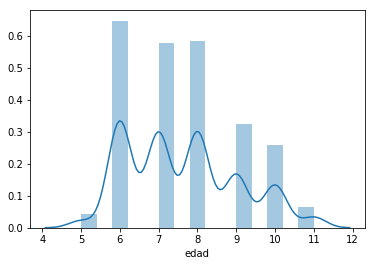

In [6]:
#Data analysis of our dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing;
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Keras library
from keras.models import Sequential
from keras.layers import Dense
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

#rms = sqrt(mean_squared_error(Y_test,y_pred1))

def isAnswerCorrect(df):
    df['respuesta'] = df['respuesta'].apply(str)
    isCorrect = (df['respuesta'] == df['respuestaJ']);
    return 1*isCorrect;

def dropDataFromTables(df):
    df.drop(labels=['id','escuela','problema','tipo','respuesta','respuestaJ'])


#Reading the data
hartfortDF = pd.read_csv('datasets/datos_hartford_marzo.csv');
isCorrectColumn = isAnswerCorrect(hartfortDF);
hartfortDF['isCorrect'] = isCorrectColumn;
hartfortDF = hartfortDF.drop(labels=['id','escuela','problema','respuesta','respuestaJ','tipo'],axis=1)
hartfortDF = hartfortDF.loc[lambda x: x.edad > 4]

#plotting variables

sns.distplot(hartfortDF['edad'])

In [18]:
hartfortDF = hartfortDF.loc[lambda x: x.edad > 4]
uncompleteData = hartfortDF.groupby(['userID']).count().loc[lambda x: x.edad < 25]
hartfortDF = hartfortDF.loc[lambda x: x.userID != '-LaQlc1fC7y-HDX9BHFG']
print(hartfortDF.groupby(['grado','genero']).count()/25)
print(hartfortDF.groupby(['grado','genero','loID']).mean())

              edad  loID  tiempo  userID  isCorrect
grado genero                                       
1     0         21    21      21      21         21
      1         10    10      10      10         10
2     0         15    15      15      15         15
      1         18    18      18      18         18
3     0         14    14      14      14         14
      1          8     8       8       8          8
4     0          7     7       7       7          7
      1         12    12      12      12         12
5     0          6     6       6       6          6
      1          4     4       4       4          4
                        edad     tiempo  isCorrect
grado genero loID                                 
1     0      0      5.952381  18.171642   0.790476
             1      5.952381  12.177747   0.761905
             2      5.952381  18.557174   0.552381
             3      5.952381  12.806424   0.476190
             4      5.952381  11.699379   0.352381
      1      0     

                           tiempo  isCorrect
grado genero edad loID                      
1     0      5    0     33.859548   0.900000
                  1     26.719324   1.000000
                  2     41.636476   0.200000
                  3     16.985896   0.500000
                  4     22.915047   0.100000
             6    0     15.661619   0.788889
                  1     10.816484   0.722222
                  2     15.753016   0.577778
                  3     11.985297   0.500000
                  4     10.705989   0.355556
             7    0     31.976236   0.600000
                  1      7.597342   1.000000
                  2     22.873405   0.800000
                  3     19.227757   0.000000
                  4      7.149064   0.800000
      1      6    0     14.382723   0.720000
                  1     12.389367   0.680000
                  2     21.105402   0.420000
                  3     11.169168   0.380000
                  4     11.550370   0.280000
2     0   